In [1]:
!git clone https://github.com/stellargraph/stellargraph.git

Cloning into 'stellargraph'...
remote: Enumerating objects: 22627, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 22627 (delta 37), reused 61 (delta 20), pack-reused 22531
Receiving objects: 100% (22627/22627), 93.44 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (14721/14721), done.


In [2]:
cd stellargraph

/content/stellargraph


In [3]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/stellargraph (from -r requirements.txt (line 4))
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.2/385.2 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from stellargraph import StellarGraph
from stellargraph.datasets import IAEnronEmployees

In [5]:
from stellargraph import StellarDiGraph
from stellargraph.datasets import IAEnronEmployees
import pandas as pd
import numpy as np
import networkx as nx

# Load the IAeronemployee dataset
dataset = IAEnronEmployees()
full_graph, edges = dataset.load()

# Create a StellarDiGraph object with the edge weights
graph = StellarDiGraph(edges=edges, edge_weight_column="time")

# Convert to a NetworkX directed graph and add edge weights
G = nx.DiGraph(graph.edges())
#for u, v, w in G.edges(data=True):
#    w['weight'] = w.get('time', 0)

# Print out the number of nodes and edges
print(graph.info())

print(len(edges))


StellarDiGraph: Directed multigraph
 Nodes: 151, Edges: 50572

 Node types:
  default: [151]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [50572]
        Weights: range=[9.2639e+08, 1.02467e+09], mean=9.93469e+08, std=1.74638e+07
        Features: none
50572


In [7]:
from node2vec import Node2Vec
import networkx as nx
from node2vec import Node2Vec
from gensim.models import Word2Vec

# Load the graph
from stellargraph import StellarDiGraph
import networkx as nx

# Load the graph as a StellarDiGraph object

# Define a function to calculate the temporal proximity between two nodes
def proximity(u, v):
    return 1 / (1 + abs(u["time"] - v["time"]))

# Create a node2vec instance with appropriate parameters
node2vec = Node2Vec(
    G,
    dimensions=128,
    walk_length=80,
    num_walks=10,
    workers=2,
    p=1,
    q=1,
    weight_key=lambda u, v, G: proximity(G.nodes[u], G.nodes[v])
)

# Train node2vec model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

unseen_node_embedding = np.zeros(128)


def temporal_embedding(u):
    try:
        return model.wv[u]
    except KeyError:
        return unseen_node_embedding









ModuleNotFoundError: ignored

In [35]:
def plot_tsne(title, x, y=None):
    tsne = TSNE(n_components=2)
    x_t = tsne.fit_transform(x)

    plt.figure(figsize=(7, 7))
    plt.title(title)
    alpha = 0.7 if y is None else 0.5

    scatter = plt.scatter(x_t[:, 0], x_t[:, 1], c=y, cmap="jet", alpha=alpha)
    if y is not None:
        plt.legend(*scatter.legend_elements(), loc="lower left", title="Classes")

<ipython-input-35-2791b6888834>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_t[:, 0], x_t[:, 1], c=y, cmap="jet", alpha=alpha)


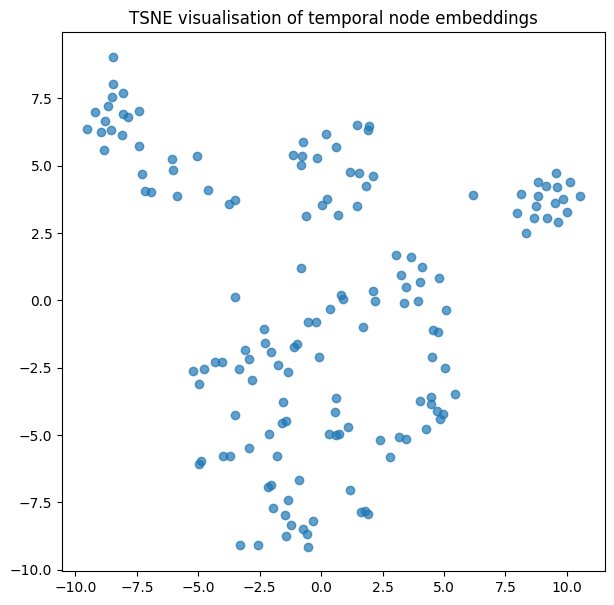

In [36]:
temporal_node_embeddings =model.wv.vectors
plot_tsne("TSNE visualisation of temporal node embeddings", temporal_node_embeddings)

In [37]:
# subset of edges to split
train_subset = 0.25
test_subset = 0.25

# number of edges to be kept in the graph
num_edges_graph = int(len(edges) * (1 - train_subset))

# keep older edges in graph, and predict more recent edges
edges_graph = edges[:num_edges_graph]
edges_other = edges[num_edges_graph:]

# split recent edges further to train and test sets
edges_train, edges_test = train_test_split(edges_other, test_size=test_subset)

print(
    f"Number of edges in graph: {len(edges_graph)}\n"
    f"Number of edges in training set: {len(edges_train)}\n"
    f"Number of edges in test set: {len(edges_test)}"
)






Number of edges in graph: 37929
Number of edges in training set: 9482
Number of edges in test set: 3161


In [38]:
def positive_and_negative_links(g, edges):
    pos = list(edges[["source", "target"]].itertuples(index=False))
    neg = sample_negative_examples(g, pos)
    return pos, neg


def sample_negative_examples(g, positive_examples):
    positive_set = set(positive_examples)

    def valid_neg_edge(src, tgt):
        return (
            # no self-loops
            src != tgt
            and
            # neither direction of the edge should be a positive one
            (src, tgt) not in positive_set
            and (tgt, src) not in positive_set
        )

    possible_neg_edges = [
        (src, tgt) for src in g.nodes() for tgt in g.nodes() if valid_neg_edge(src, tgt)
    ]
    return random.sample(possible_neg_edges, k=len(positive_examples))


pos, neg = positive_and_negative_links(graph, edges_train)
pos_test, neg_test = positive_and_negative_links(graph, edges_test)

In [39]:
def operator_l2(u, v):
    return (u - v) ** 2


binary_operator = operator_l2

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


def link_examples_to_features(link_examples, transform_node):
    op_func = (
        operator_func[binary_operator]
        if isinstance(binary_operator, str)
        else binary_operator
    )
    return [
        op_func(transform_node(src), transform_node(dst)) for src, dst in link_examples
    ]


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

In [41]:
def labelled_links(positive_examples, negative_examples):
    return (
        positive_examples + negative_examples,
        np.repeat([1, 0], [len(positive_examples), len(negative_examples)]),
    )


link_examples, link_labels = labelled_links(pos, neg)
link_examples_test, link_labels_test = labelled_links(pos_test, neg_test)

In [32]:
temporal_clf = link_prediction_classifier()
temporal_link_features = link_examples_to_features(link_examples, temporal_embedding)
temporal_link_features_test = link_examples_to_features(
    link_examples_test, temporal_embedding
)
temporal_clf.fit(temporal_link_features, link_labels)
temporal_score = evaluate_roc_auc(
    temporal_clf, temporal_link_features_test, link_labels_test
)

print(f"Score (ROC AUC): {temporal_score:.2f}")

Score (ROC AUC): 0.98


In [8]:
pip install node2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


In [ ]:
pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/stellargraph
  Preparing metadata (setup.py) ... done
ERROR: Package 'stellargraph' requires a different Python: 3.9.16 not in '<3.9.0,>=3.6.0'
